### Download & Import required pacages

In [ ]:
!pip install -q --upgrade pip
!pip install -q matplotlib
!pip install -q pandas
!pip install -q numpy
!pip install -q os
!pip install -q tensorflow
!pip install -q keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Prep data

### For ANN Model

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

### For CNN Model

In [3]:
img_rows, img_cols = 28, 28
num_classes =10

def data_prep(raw):

    num_images = raw.shape[0]
    x_shaped_array = raw.reshape(num_images, img_rows, img_cols, 1)
    # normalization
    out_x = x_shaped_array / 255
    return out_x

In [4]:
train_images = data_prep(train_images)
test_images = data_prep(test_images)

In [22]:
test_images.shape

(10000, 28, 28, 1)

2

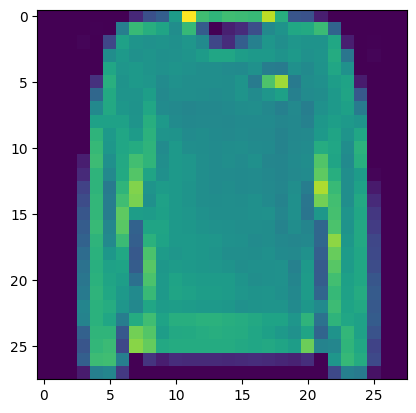

In [100]:
plt.imshow(train_images[225])
train_labels[225] 

# Final Models

## ANN Model

### Model architucte

In [101]:
input_image = (28, 28)
dense_size1 = 128
output_layer = 10
Batch_siza = 256

### Model defenition

In [102]:
model = Sequential([
    Flatten(input_shape = input_image),
    Dense(dense_size1, activation='relu'),
    Dense(output_layer, activation='softmax')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [104]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [111]:
h = model.fit(
  train_images,
  train_labels,
  epochs=20,
  validation_data = (test_images, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.7881 - loss: 0.6185 - val_accuracy: 0.8372 - val_loss: 0.4617
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.8617 - loss: 0.3844 - val_accuracy: 0.8669 - val_loss: 0.3693
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.8777 - loss: 0.3312 - val_accuracy: 0.8684 - val_loss: 0.3670
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.8882 - loss: 0.3129 - val_accuracy: 0.8704 - val_loss: 0.3554
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.8922 - loss: 0.2975 - val_accuracy: 0.8701 - val_loss: 0.3501
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.8975 - loss: 0.2766 - val_accuracy: 0.8760 - val_loss: 0.3511
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.9003 - loss: 0.2621 - val_accuracy: 0.8801 - val_loss: 0.3399
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9061 -

## CNN Model

### Model architucte

In [6]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
filter_size1 = 5
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# 93 with 15 epoch

### Model defenition

In [17]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Dropout(0.2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [18]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,362 (1.62 MB)

 Trainable params: 424,362 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [19]:
h = model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=10,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7606 - loss: 0.6863 - val_accuracy: 0.8800 - val_loss: 0.3387
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8826 - loss: 0.3206 - val_accuracy: 0.8941 - val_loss: 0.2883
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9001 - loss: 0.2680 - val_accuracy: 0.9001 - val_loss: 0.2746
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9161 - loss: 0.2288 - val_accuracy: 0.9052 - val_loss: 0.2582
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9241 - loss: 0.2054 - val_accuracy: 0.9099 - val_loss: 0.2507
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9318 - loss: 0.1841 - val_accuracy: 0.9056 - val_loss: 0.2550
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9375 - loss: 0.1664 - val_accuracy: 0.9136 - val_loss: 0.2421
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9450 - loss: 0.1456 - val_accu

## Evaluate the Model

In [20]:
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9175 - loss: 0.2548


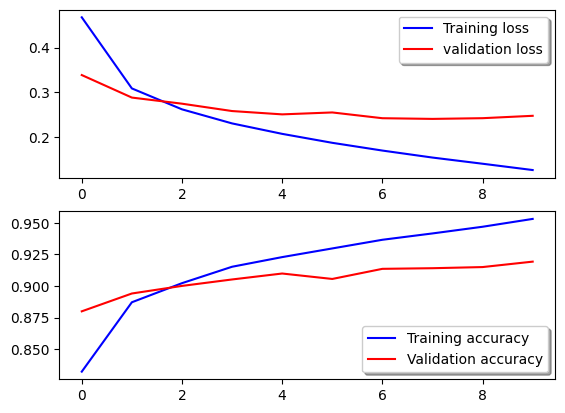

In [21]:
# Plot the loss and accuracy curves for training and validation for 50 epochs
fig, ax = plt.subplots(2,1)
ax[0].plot(h.history['loss'], color='b', label="Training loss")
ax[0].plot(h.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(h.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(h.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


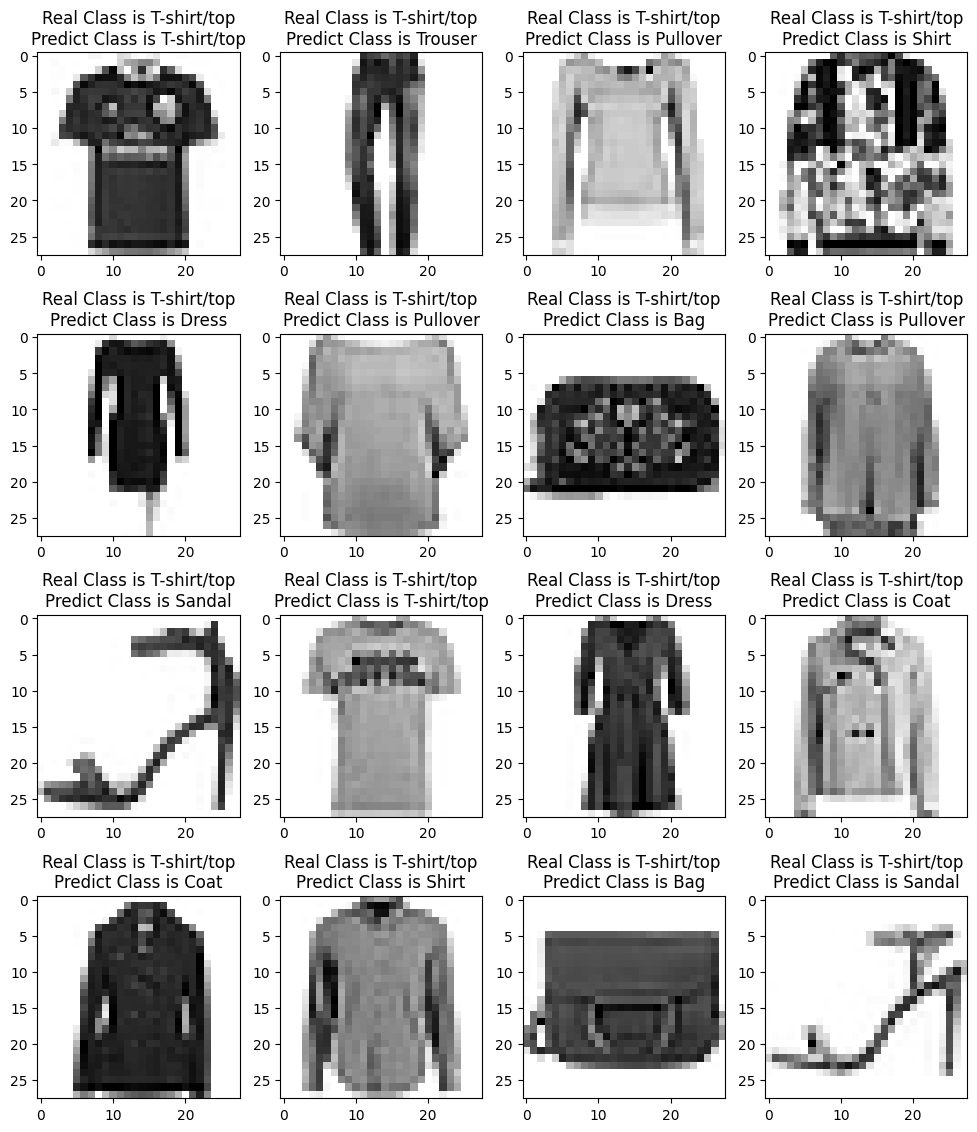

In [14]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(test_images)
X_test__ = test_images.reshape(test_images.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[test_labels[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}")

## Save the Model

In [15]:
model.save("cnn_model.h5")

## Data augmentation

In [16]:
data_augmentor = ImageDataGenerator(
    rescale = 1/255,
    zoom_range=0.1, 
    horizontal_flip=False,
    fill_mode='nearest',
)

# fit the training data
data_augmentor.fit(train_images)

In [17]:
from tensorflow.keras.preprocessing.image import save_img

# Create a directory for the augmented images
os.makedirs('saved_data', exist_ok=True)

# Setup the generator

generator = data_augmentor.flow(train_images, train_labels, batch_size=Batch_siza)

for i in range(200):
    images_batch, labels_batch = next(generator)
    np.save(f'saved_data/train_images_batch_{i}.npy', images_batch)
    np.save(f'saved_data/train_labels_batch_{i}.npy', labels_batch)

all_images = []
all_labels = []

for i in range(200):
    images_batch, labels_batch = next(generator)
    all_images.append(images_batch)
    all_labels.append(labels_batch)

# Convert lists to arrays
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Save
np.save('saved_data/all_train_images.npy', all_images)
np.save('saved_data/all_train_labels.npy', all_labels)

In [196]:
h = model.fit(
    all_images,
    to_categorical(all_labels),
    batch_size = Batch_siza,
    epochs=50,
    validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1010 - loss: 2.6459 - val_accuracy: 0.7147 - val_loss: 2.3620
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1016 - loss: 2.3026 - val_accuracy: 0.7163 - val_loss: 2.3542
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.7162 - val_loss: 2.3551
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0987 - loss: 2.3026 - val_accuracy: 0.7166 - val_loss: 2.3519
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1016 - loss: 2.3026 - val_accuracy: 0.7157 - val_loss: 2.3517
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.7171 - val_loss: 2.3475
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1036 - loss: 2.3025 - val_accuracy: 0.7170 - val_loss: 2.3477
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1008 - loss: 2.3026 - val_accu

## Other Models tested

In [18]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
filter_size1 = 3
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)


In [20]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Dropout(0.2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [21]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [22]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=80,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7606 - loss: 0.6731 - val_accuracy: 0.8779 - val_loss: 0.3376
Epoch 2/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8830 - loss: 0.3209 - val_accuracy: 0.9014 - val_loss: 0.2756
Epoch 3/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9008 - loss: 0.2689 - val_accuracy: 0.9117 - val_loss: 0.2457
Epoch 4/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9130 - loss: 0.2363 - val_accuracy: 0.9091 - val_loss: 0.2524
Epoch 5/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9214 - loss: 0.2141 - val_accuracy: 0.9132 - val_loss: 0.2328
Epoch 6/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9298 - loss: 0.1898 - val_accuracy: 0.9156 - val_loss: 0.2283
Epoch 7/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9369 - loss: 0.1680 - val_accuracy: 0.9180 - val_loss: 0.2262
Epoch 8/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9456 - loss: 0.1474 - val_accu

In [197]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
num_filters3 = 20
filter_size1 = 3
filter_size2 = 3
filter_size3 = 4
pool_size1 = 2
pool_size2 = 2
pool_size3 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

In [198]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Conv2D(num_filters3, filter_size3, input_shape = output_image2),
  AveragePooling2D(pool_size = pool_size3),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [199]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [202]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=80,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8263 - loss: 38.8655 - val_accuracy: 0.8439 - val_loss: 4.4761
Epoch 2/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8454 - loss: 3.2807 - val_accuracy: 0.8439 - val_loss: 2.0364
Epoch 3/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8438 - loss: 1.5443 - val_accuracy: 0.8396 - val_loss: 1.2109
Epoch 4/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8437 - loss: 1.0220 - val_accuracy: 0.8506 - val_loss: 0.9240
Epoch 5/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8517 - loss: 0.7477 - val_accuracy: 0.8475 - val_loss: 0.7791
Epoch 6/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8575 - loss: 0.5847 - val_accuracy: 0.8510 - val_loss: 0.7028
Epoch 7/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8625 - loss: 0.5225 - val_accuracy: 0.8581 - val_loss: 0.6126
Epoch 8/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8683 - loss: 0.4518 - val_acc

In [203]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  AveragePooling2D(pool_size = pool_size2),
  Conv2D(num_filters3, filter_size3, input_shape = output_image2),
  MaxPooling2D(pool_size = pool_size3),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [204]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
num_filters3 = 20
filter_size1 = 3
filter_size2 = 3
filter_size3 = 4
pool_size1 = 2
pool_size2 = 2
pool_size3 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

## 91%

In [205]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Conv2D(num_filters3, filter_size3, input_shape = output_image2),
  MaxPooling2D(pool_size = pool_size3),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [206]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [207]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=30,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7152 - loss: 0.8339 - val_accuracy: 0.8347 - val_loss: 0.4310
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8567 - loss: 0.3991 - val_accuracy: 0.8666 - val_loss: 0.3657
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8751 - loss: 0.3451 - val_accuracy: 0.8850 - val_loss: 0.3101
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8939 - loss: 0.2970 - val_accuracy: 0.8856 - val_loss: 0.3072
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8987 - loss: 0.2791 - val_accuracy: 0.8929 - val_loss: 0.2945
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9057 - loss: 0.2630 - val_accuracy: 0.8983 - val_loss: 0.2893
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9109 - loss: 0.2417 - val_accuracy: 0.9044 - val_loss: 0.2626
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9198 - loss: 0.2220 - val_accu

In [208]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [209]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=15,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9753 - loss: 0.0674 - val_accuracy: 0.9089 - val_loss: 0.4041
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9775 - loss: 0.0611 - val_accuracy: 0.9038 - val_loss: 0.4323
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9785 - loss: 0.0568 - val_accuracy: 0.9089 - val_loss: 0.4180
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9814 - loss: 0.0524 - val_accuracy: 0.9141 - val_loss: 0.4200
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9810 - loss: 0.0506 - val_accuracy: 0.9059 - val_loss: 0.4458
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9835 - loss: 0.0459 - val_accuracy: 0.9040 - val_loss: 0.4781
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9861 - loss: 0.0401 - val_accuracy: 0.9072 - val_loss: 0.5051
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9820 - loss: 0.0488 - val_accu

In [210]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
num_filters3 = 20
filter_size1 = 3
filter_size2 = 3
filter_size3 = 4
pool_size1 = 2
pool_size2 = 2
pool_size3 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# 91% with 15 epoch

In [211]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Conv2D(num_filters3, filter_size3, input_shape = output_image2),
  MaxPooling2D(pool_size = pool_size3),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])


In [212]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [213]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6884 - loss: 0.8793 - val_accuracy: 0.8542 - val_loss: 0.4072
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8609 - loss: 0.3911 - val_accuracy: 0.8767 - val_loss: 0.3443
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8798 - loss: 0.3363 - val_accuracy: 0.8772 - val_loss: 0.3283
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8941 - loss: 0.3000 - val_accuracy: 0.8930 - val_loss: 0.2963
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8987 - loss: 0.2818 - val_accuracy: 0.9003 - val_loss: 0.2793
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9106 - loss: 0.2503 - val_accuracy: 0.8967 - val_loss: 0.2914
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9144 - loss: 0.2395 - val_accuracy: 0.9031 - val_loss: 0.2691
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9168 - loss: 0.2291 - val_accu

In [214]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  AveragePooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  AveragePooling2D(pool_size = pool_size2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [215]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [216]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7360 - loss: 0.7423 - val_accuracy: 0.8574 - val_loss: 0.4091
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8637 - loss: 0.3864 - val_accuracy: 0.8740 - val_loss: 0.3563
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8776 - loss: 0.3373 - val_accuracy: 0.8750 - val_loss: 0.3361
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8892 - loss: 0.3054 - val_accuracy: 0.8814 - val_loss: 0.3345
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8942 - loss: 0.2842 - val_accuracy: 0.8839 - val_loss: 0.3217
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9027 - loss: 0.2661 - val_accuracy: 0.8950 - val_loss: 0.2908
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9087 - loss: 0.2450 - val_accuracy: 0.8890 - val_loss: 0.3113
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9164 - loss: 0.2295 - val_accu

In [217]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  AveragePooling2D(pool_size = pool_size2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])


In [218]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [219]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7646 - loss: 0.6822 - val_accuracy: 0.8730 - val_loss: 0.3624
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8814 - loss: 0.3290 - val_accuracy: 0.8947 - val_loss: 0.2941
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8962 - loss: 0.2822 - val_accuracy: 0.9061 - val_loss: 0.2663
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9097 - loss: 0.2462 - val_accuracy: 0.9112 - val_loss: 0.2465
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9185 - loss: 0.2209 - val_accuracy: 0.9134 - val_loss: 0.2398
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9290 - loss: 0.1968 - val_accuracy: 0.9098 - val_loss: 0.2475
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9323 - loss: 0.1852 - val_accuracy: 0.9190 - val_loss: 0.2294
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9399 - loss: 0.1633 - val_accu

In [220]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
filter_size1 = 3
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# 92% with 10 eapchs

In [221]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])


In [222]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [223]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7789 - loss: 0.6194 - val_accuracy: 0.8834 - val_loss: 0.3177
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8930 - loss: 0.2982 - val_accuracy: 0.9070 - val_loss: 0.2596
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9121 - loss: 0.2400 - val_accuracy: 0.9123 - val_loss: 0.2404
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9250 - loss: 0.2076 - val_accuracy: 0.9012 - val_loss: 0.2662
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9332 - loss: 0.1824 - val_accuracy: 0.9159 - val_loss: 0.2363
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9411 - loss: 0.1572 - val_accuracy: 0.9178 - val_loss: 0.2398
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9501 - loss: 0.1367 - val_accuracy: 0.9194 - val_loss: 0.2364
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9548 - loss: 0.1207 - val_accu

In [224]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 32
num_filters2 = 64
filter_size1 = 3
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# 92% epoch 12

In [225]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])


In [226]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [227]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7736 - loss: 0.6576 - val_accuracy: 0.8826 - val_loss: 0.3296
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8959 - loss: 0.2897 - val_accuracy: 0.8936 - val_loss: 0.3084
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9130 - loss: 0.2424 - val_accuracy: 0.9097 - val_loss: 0.2472
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9260 - loss: 0.1996 - val_accuracy: 0.9163 - val_loss: 0.2346
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9382 - loss: 0.1739 - val_accuracy: 0.9169 - val_loss: 0.2355
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9425 - loss: 0.1542 - val_accuracy: 0.9143 - val_loss: 0.2478
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9524 - loss: 0.1314 - val_accuracy: 0.9194 - val_loss: 0.2308
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9609 - loss: 0.1111 - val_accu

In [228]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
filter_size1 = 3
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# 92% 12 epochs 

In [229]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Dropout(0.2),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [230]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [231]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7502 - loss: 0.7004 - val_accuracy: 0.8798 - val_loss: 0.3415
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8766 - loss: 0.3402 - val_accuracy: 0.8927 - val_loss: 0.2955
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8959 - loss: 0.2882 - val_accuracy: 0.9031 - val_loss: 0.2690
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9093 - loss: 0.2476 - val_accuracy: 0.9146 - val_loss: 0.2381
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9173 - loss: 0.2214 - val_accuracy: 0.9141 - val_loss: 0.2393
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9281 - loss: 0.1968 - val_accuracy: 0.9175 - val_loss: 0.2253
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9353 - loss: 0.1776 - val_accuracy: 0.9163 - val_loss: 0.2346
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9421 - loss: 0.1595 - val_accu

In [232]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 32
num_filters2 = 64
num_filters3 = 20
filter_size1 = 3
filter_size2 = 3
filter_size3 = 4
pool_size1 = 2
pool_size2 = 2
pool_size3 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# test_accuracy: 91%  15 epochs

In [233]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Conv2D(num_filters3, filter_size3, input_shape = output_image2),
  MaxPooling2D(pool_size = pool_size3),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [234]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [235]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6897 - loss: 0.8702 - val_accuracy: 0.8568 - val_loss: 0.4050
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8646 - loss: 0.3822 - val_accuracy: 0.8811 - val_loss: 0.3314
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8843 - loss: 0.3243 - val_accuracy: 0.8900 - val_loss: 0.3043
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8957 - loss: 0.2917 - val_accuracy: 0.8936 - val_loss: 0.2900
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9041 - loss: 0.2666 - val_accuracy: 0.9019 - val_loss: 0.2674
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9109 - loss: 0.2454 - val_accuracy: 0.9039 - val_loss: 0.2617
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9171 - loss: 0.2286 - val_accuracy: 0.9087 - val_loss: 0.2526
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9233 - loss: 0.2121 - val_accu

In [236]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
filter_size1 = 3
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

# 93% with epoch 

In [237]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Dropout(0.2),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Dropout(0.2),
  Flatten(),
  Dense(dense_size1, activation='relu'),
  Dense(dense_size2, activation='softmax'),
])

In [238]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [239]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=40,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7284 - loss: 0.7876 - val_accuracy: 0.8706 - val_loss: 0.3696
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8683 - loss: 0.3650 - val_accuracy: 0.8856 - val_loss: 0.3212
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8875 - loss: 0.3121 - val_accuracy: 0.9016 - val_loss: 0.2808
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8982 - loss: 0.2759 - val_accuracy: 0.9055 - val_loss: 0.2639
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9115 - loss: 0.2420 - val_accuracy: 0.9099 - val_loss: 0.2518
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9168 - loss: 0.2261 - val_accuracy: 0.9164 - val_loss: 0.2348
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9248 - loss: 0.2007 - val_accuracy: 0.9176 - val_loss: 0.2276
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9331 - loss: 0.1809 - val_accu

In [240]:
input_image = (28, 28, 1)
Batch_siza = 256
stride1 = 1
stride2 = 1
num_filters1 = 64
num_filters2 = 32
filter_size1 = 3
filter_size2 = 3
pool_size1 = 2
pool_size2 = 2
dense_size1 = 256
dense_size2 = 10
x1 = int(((input_image[0]-filter_size1) + 1)/stride1)
y1 = int(((input_image[1]-filter_size1) + 1)/stride1)
output_image1 = (x1, y1, 1)
x2 = int(((x1-filter_size2) + 1)/stride2)
y2 = int(((y1-filter_size2) + 1)/stride2)
output_image2 = (x2, y2, 1)

In [241]:
model = Sequential([
  Conv2D(num_filters1, filter_size1, padding="same",kernel_initializer='he_normal', input_shape = input_image, strides= stride1),
  MaxPooling2D(pool_size=pool_size1),
  Dropout(0.2),
  Conv2D(num_filters2, filter_size2, padding="same", input_shape = output_image1, strides= stride1),
  MaxPooling2D(pool_size = pool_size2),
  Dropout(0.2),
  Flatten(),
  Dense(dense_size1, activation='softmax'),
  Dense(dense_size2, activation='softmax'),
])

In [242]:
model.compile(
  
  'Adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [244]:
model.fit(
  train_images,
  to_categorical(train_labels),
  batch_size = Batch_siza,
  epochs=110,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5550 - loss: 2.1299 - val_accuracy: 0.6758 - val_loss: 1.8521
Epoch 2/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6831 - loss: 1.7768 - val_accuracy: 0.6972 - val_loss: 1.5623
Epoch 3/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7162 - loss: 1.5031 - val_accuracy: 0.7468 - val_loss: 1.3152
Epoch 4/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7487 - loss: 1.2672 - val_accuracy: 0.7572 - val_loss: 1.1228
Epoch 5/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7583 - loss: 1.0854 - val_accuracy: 0.7599 - val_loss: 0.9791
Epoch 6/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7590 - loss: 0.9562 - val_accuracy: 0.7588 - val_loss: 0.8835
Epoch 7/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7625 - loss: 0.8559 - val_accuracy: 0.7639 - val_loss: 0.7991
Epoch 8/110
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7650 - loss: 0.7833 - 